# 1. 定义基本常数包括股票代码，时间

In [1]:
#!pip install git+https://github.com/maxwillzq/algoTrading.git
#!pip install yahoo_fin

In [2]:
import algotrading
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.news as sn
import yahoo_fin.stock_info as si
import numpy as np

In [7]:
# collect data first
stock_name = "QCOM"
days = 1000
st = algotrading.stock.Stock(stock_name)
st.read_data(days)
st.generate_more_data()
status, messages, result_dict = st.is_good_business()
print(f"{st.name} is a good business? \nAnswer: {status}")
if status == False:
    print("Reason:", messages)
    #print("result_dict", result_dict)

QCOM is a good business? 
Answer: True


# 2. 分析基本财务数据

In [37]:
st = algotrading.stock.Stock(stock_name)

In [38]:
finance_data = si.get_financials(stock_name)

In [39]:
finance_data.keys()

dict_keys(['yearly_income_statement', 'yearly_balance_sheet', 'yearly_cash_flow', 'quarterly_income_statement', 'quarterly_balance_sheet', 'quarterly_cash_flow'])

In [40]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
yearly_income_statement = finance_data['yearly_income_statement'].T.sort_index()
yearly_income_statement[column_list].pct_change()

Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2017-12-31,NaN,NaN,NaN,NaN
2018-12-31,0.387724,0.320577,0.233134,0.373527
2019-12-31,-0.164029,0.246198,0.163489,0.266109
2020-12-31,0.576738,0.195867,0.127130,0.215964


In [41]:
yearly_cash_flow.columns

Index(['investments', 'changeToLiabilities',
       'totalCashflowsFromInvestingActivities', 'netBorrowings',
       'totalCashFromFinancingActivities', 'changeToOperatingActivities',
       'issuanceOfStock', 'netIncome', 'changeInCash', 'effectOfExchangeRate',
       'totalCashFromOperatingActivities', 'depreciation',
       'otherCashflowsFromInvestingActivities',
       'otherCashflowsFromFinancingActivities', 'changeToNetincome',
       'capitalExpenditures', 'repurchaseOfStock'],
      dtype='object', name='Breakdown')

In [42]:
column_list = ['totalCashFromOperatingActivities','capitalExpenditures']
yearly_cash_flow = finance_data['yearly_cash_flow'].T.sort_index()
yearly_cash_flow[column_list].pct_change()

Breakdown,totalCashFromOperatingActivities,capitalExpenditures
endDate,,
2017-12-31,NaN,NaN
2018-12-31,0.208870,1.066686
2019-12-31,0.240486,0.085304
2020-12-31,0.066999,0.000861


In [43]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
quarterly_income_statement = finance_data['quarterly_income_statement'].T.sort_index()
quarterly_income_statement[column_list].pct_change()

Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2020-03-31,NaN,NaN,NaN,NaN
2020-06-30,0.056304,0.040622,0.011878,0.053560
2020-09-30,0.515257,0.162741,0.348315,0.148927
2020-12-31,0.429901,0.323339,0.588930,0.307499


In [53]:
earnings = si.get_earnings(stock_name)
earnings["yearly_revenue_earnings"]/1000000000

,date,revenue,earnings
0,0.000002,110.855,12.662
1,0.000002,136.819,30.736
2,0.000002,161.857,34.343
3,0.000002,182.527,40.269


In [45]:
earnings_history = si.get_earnings_history(stock_name)
earnings_history = pd.DataFrame(earnings_history)
earnings_history = earnings_history.set_index("startdatetime")
earnings_history = earnings_history.sort_index()
earnings_history.columns


Index(['ticker', 'companyshortname', 'startdatetimetype', 'epsestimate',
       'epsactual', 'epssurprisepct', 'timeZoneShortName',
       'gmtOffsetMilliSeconds', 'quoteType'],
      dtype='object')

<AxesSubplot:xlabel='startdatetime'>

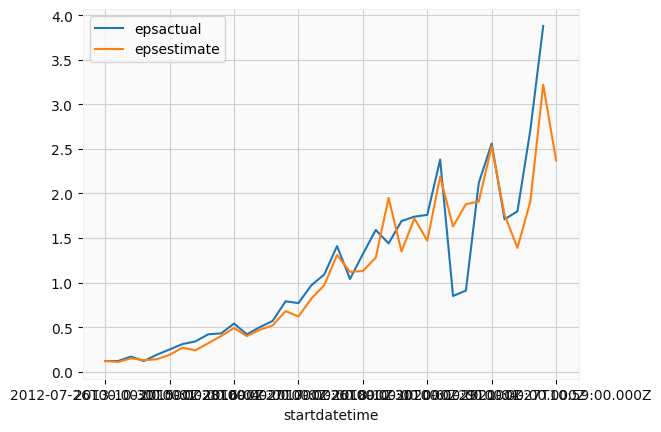

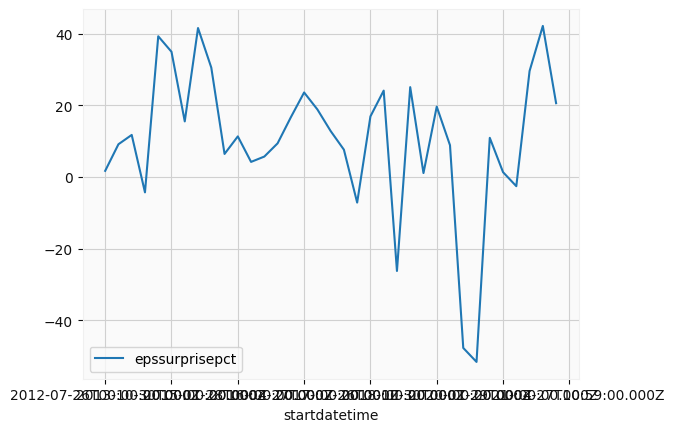

In [46]:
earnings_history[["epsactual", "epsestimate"]].plot()
earnings_history[["epssurprisepct"]].plot()

In [12]:
valuation = si.get_stats_valuation(stock_name)
valuation

,Unnamed: 0,As of Date: 3/30/2021Current,12/31/2020,9/30/2020,6/30/2020,3/31/2020
0,Market Cap (intraday) 5,603.85B,648.32B,769.68B,581.20B,508.30B
1,Enterprise Value 3,551.20B,648.32B,769.68B,581.20B,508.30B
2,Trailing P/E,26.43,31.57,30.78,27.35,21.28
3,Forward P/E 1,19.30,17.51,31.55,25.51,22.83
4,PEG Ratio (5 yr expected) 1,0.88,0.80,1.49,1.16,1.13
5,Price/Sales (ttm),6.47,7.08,9.86,8.01,7.47
6,Price/Book (mrq),4.40,4.80,6.71,5.44,4.99
7,Enterprise Value/Revenue 3,0.86,2.93,4.96,3.78,4.45
8,Enterprise Value/EBITDA 6,2.91,6.82,27.31,9.48,109.55


# 3. 分析师未来前景预测

In [13]:
analysts_info = si.get_analysts_info(stock_name)
analysts_info.keys()

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])

In [14]:
analysts_info['Earnings Estimate']

,Earnings Estimate,Current Qtr. (Mar 2021),Next Qtr. (Jun 2021),Current Year (2021),Next Year (2022)
0,No. of Analysts,21.00,12.00,33.00,36.00
1,Avg. Estimate,1.93,2.79,10.22,11.86
2,Low Estimate,1.59,2.46,9.66,10.49
3,High Estimate,2.19,2.98,10.71,13.42
4,Year Ago EPS,1.31,2.21,8.06,10.22


In [15]:
analysts_info['Earnings History']

,Earnings History,3/30/2020,6/29/2020,9/29/2020,12/30/2020
0,EPS Est.,0.87,2.06,2.18,3.18
1,EPS Actual,1.31,2.21,2.78,3.35
2,Difference,0.44,0.15,0.6,0.17
3,Surprise %,50.60%,7.30%,27.50%,5.30%


In [16]:
analysts_info['EPS Trend']

,EPS Trend,Current Qtr. (Mar 2021),Next Qtr. (Jun 2021),Current Year (2021),Next Year (2022)
0,Current Estimate,1.93,2.79,10.22,11.86
1,7 Days Ago,1.95,2.86,10.29,12.01
2,30 Days Ago,1.96,2.86,10.36,12.06
3,60 Days Ago,2.03,2.91,10.33,12.41
4,90 Days Ago,2.04,3.09,10.37,12.51


In [17]:
analysts_info['Growth Estimates']

,Growth Estimates,BABA,Industry,Sector(s),S&P 500
0,Current Qtr.,47.30%,NaN,NaN,NaN
1,Next Qtr.,26.20%,NaN,NaN,NaN
2,Current Year,26.80%,NaN,NaN,NaN
3,Next Year,16.00%,NaN,NaN,NaN
4,Next 5 Years (per annum),3.82%,NaN,NaN,NaN
5,Past 5 Years (per annum),29.64%,NaN,NaN,NaN


In [18]:
print("Next earning date ", si.get_next_earnings_date(stock_name))

Next earning date  2021-05-19 17:00:00


# 4. 股票技术面分析

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


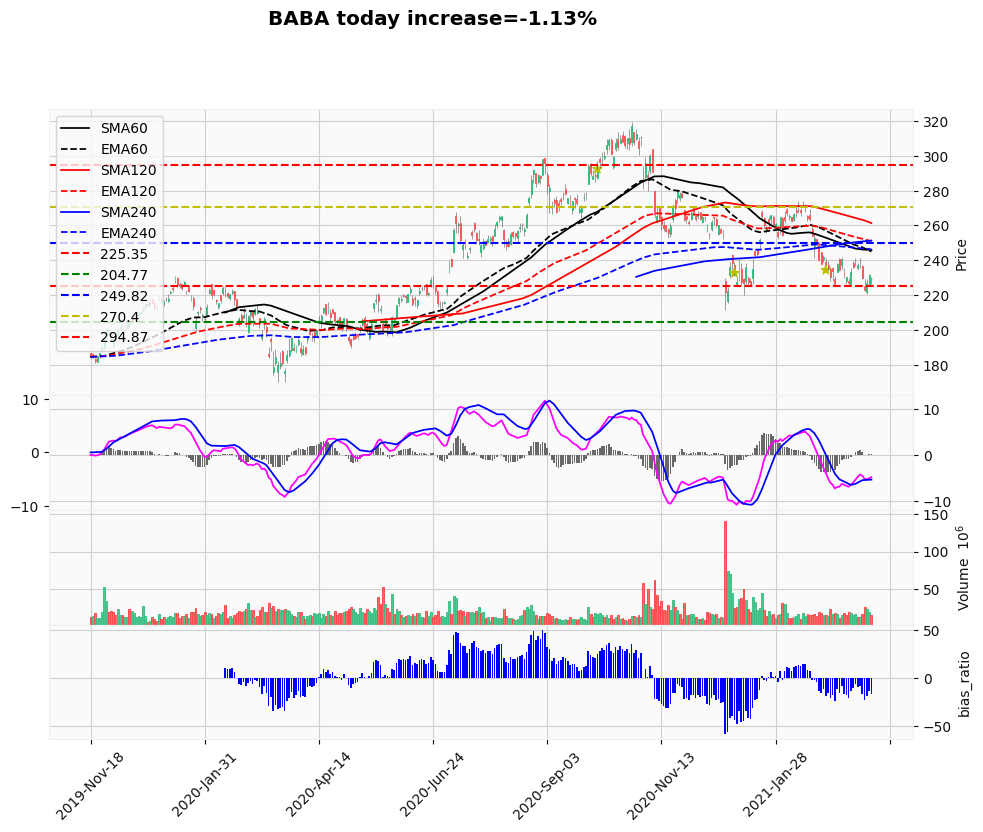

In [20]:
st.read_data(days=500)
st.generate_more_data()
st.plot(None, mav=[60, 120, 240], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=60)

<AxesSubplot:title={'center':'long term trend'}, xlabel='Date'>

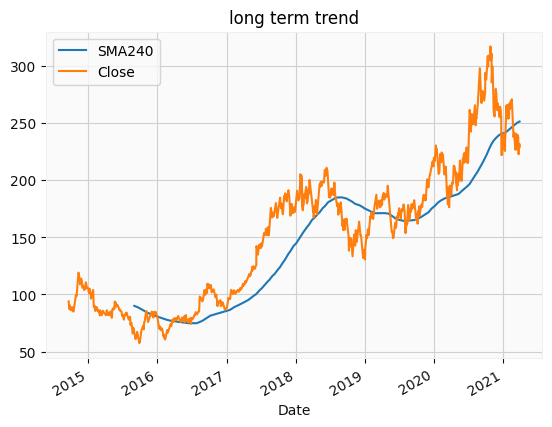

In [25]:
st.read_data(days=3000)
st.df[["SMA240",'Close']].plot(title="long term trend")

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


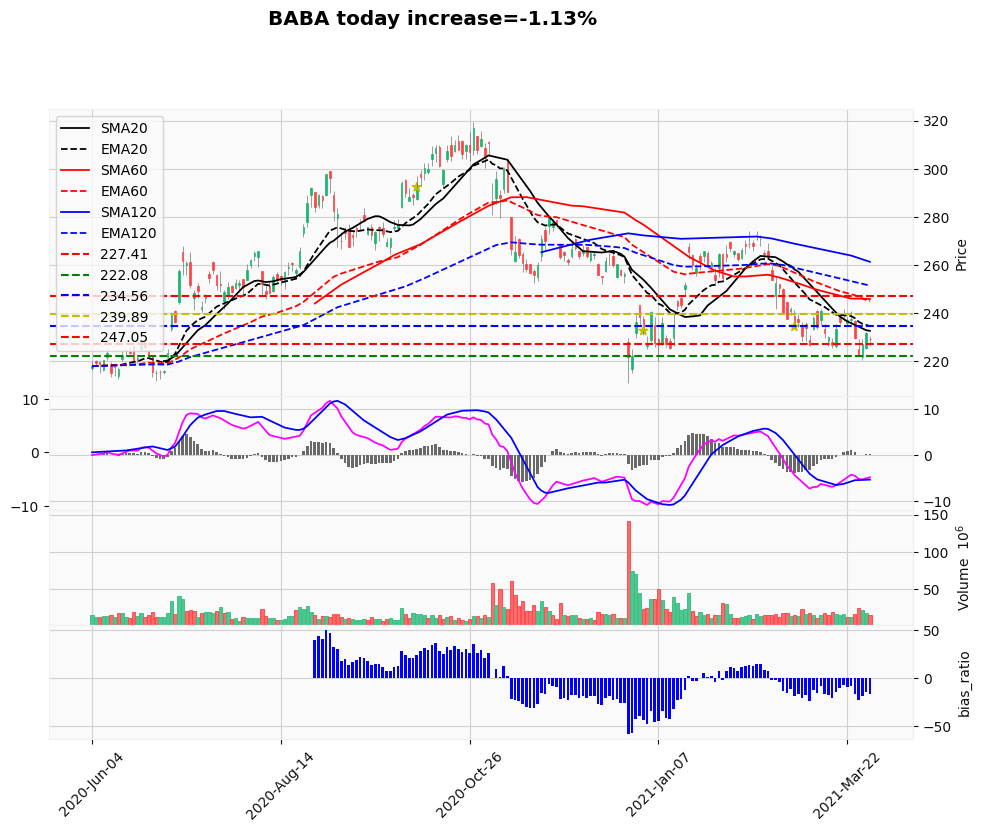

In [22]:
st.read_data(days=300)
st.generate_more_data()
st.plot(None, mav=[20, 60, 120], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=20)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


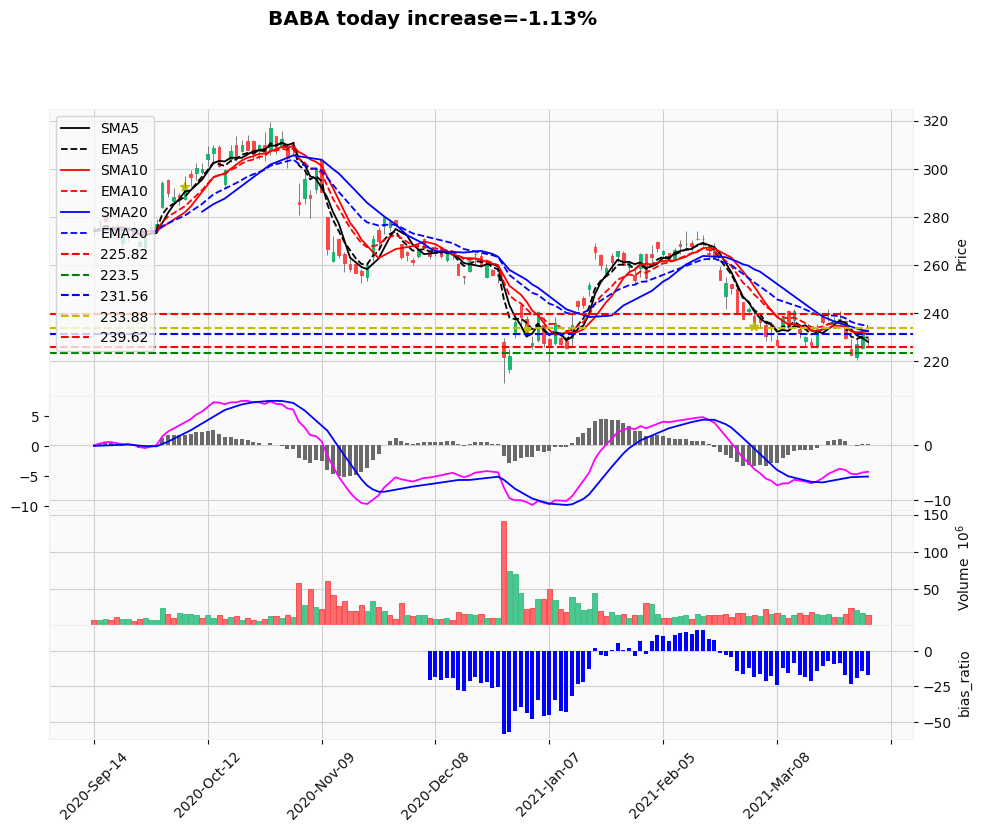

In [23]:
st.read_data(days=200)
st.generate_more_data()
st.plot(None, mav=[5, 10, 20], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=5)